# Deep Learning NLP Final Project



## 1. Introduction


### ***Sidedi (Sistem Pendeteksi Judi)***

Author    :
1. Gustana Satiawan
2. Muhammad Daffa
2. Firman Syah


***Background:***   
This system aims to mitigate illegal online gambling in Indonesia. The model will classify sites as gambling or not based on their content. Then, the authorities will block the gambling sites immediately. In the future, this project will have social value by contributing to diminishing illegal gambling sites and preventing catastrophic costs in Indonesian households because of online gambling.


***Objective:***
1. Determine correctly which website is categorized as a gambling website.
2. Prediction result is a basis for autonomous webisite blokcing

**The objective of this project** is to automate the identification and blocking of online gambling websites while minimizing the risk of errorly blocking legitimate sites. By prioritizing **precision** as a key metric in our predictive model, we aim to ensure that when a website is flagged as gambling-related, it is highly likely to be accurate, thus reducing false positives. This approach will complies with legal standards and ethical considerations. Ultimately, our goal is to create a scalable, reliable system that efficiently focuses resources on effectively managing and restricting access to gambling content without impacting non-gambling websites


---

## 2. Import Libraries

This section will import libraries that will be used to model NLP Neutral Network. Additionally, this project will utilize tensorflow version 2.15 and contractions library.

In [ ]:
# Downgrade Tensorflow to 2.15 version
!pip install --upgrade "tensorflow<2.16" "tf-keras<2.16"

In [ ]:
!pip install Sastrawi

In [3]:
from google.colab import drive # Importing libraries that will be used in the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string
import re
from wordcloud import WordCloud


import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Reshape
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## 3. Data Loading

The data for training is obtained from website scrapping. We scrapped to a website that is categorized as a gambling website and non gambling website while manually labeling the class

In [4]:
# Mount colab with google drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Hacktiv8/Final Project/Dataset/"

Mounted at /content/drive
Clean_Manual.csv  get_text_data.csv


In [5]:
# Loading the data from personal google drive.
data_ori = pd.read_csv('/content/drive/My Drive/Hacktiv8/Final Project/Dataset/Clean_Manual.csv')
data_ori

,web_url,cleaned_content_v1,label
0,https://www.nikosgreekrestaurant.com/,Untuk kalian yang sedang mencari slot gacor un...,1
1,https://electricfeelgood.com/,Situs Judi Slot Online Gacor Hari Ini Paling T...,1
2,https://thedinerqc.com/,Vegas123 Situs Judi Slot Online Slot88 Gacor R...,1
3,https://threeirishgirls.com/,TEXAS88: Situs Judi Slot Online Paling Gacor T...,1
4,https://pafipcbitung.org/,Registrasi Bergabunglah DEWANAGA77 untuk menga...,1
5,https://pafikutaitimur.org/,OLYMPUS88: Situs Judi Slot Online Daftar Slot8...,1
6,https://justtransitioninitiative.org/,SIP33 - Situs Judi Slot Online Maxwin Gacor & ...,1
7,https://thedinerqc.com/,Vegas123 Situs Judi Slot Online Slot88 Gacor R...,1
8,https://pafisumbabarat.org/,SBOBET88: Daftar Link SBOBET Agen Taruhan Judi...,1
9,https://www.seattlemandaringate.com/,Slot88 > Link Situs Slot Gacor Paling Akurat G...,1


Label number 1 is website that is considered as online gambling website, while on the other hand, label 0 is considered as non gambling website

Further, we need to check the missing value and duplicated value inside the dataframe

In [6]:
# Check Missing Value
data_ori.isnull().sum()

,0
web_url,0
cleaned_content_v1,0
label,0


No missing values detected in the dataframe

In [7]:
# Check duplicated value
data_ori.duplicated().sum()

0

No duplicated value inside our data



In [8]:
data_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   web_url             54 non-null     object
 1   cleaned_content_v1  54 non-null     object
 2   label               54 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


Creating a new dataframe for further processing

In [9]:
# Create New DataFrame for Sentiment Analysis
df = data_ori.copy()

Data Loading is completed and ready for further processing

---

## 4. Exploratory Data Analysis (EDA)

### 4.1 Count of Sentences and Words

We want to know the length of tokenized word and tokenized sentence review before text processing. This is the initial stage before we are processing with the neural learning to give a better understanding of our data

In [10]:
# Tokenize (Words and Sentences)

# Download punkt
nltk.download('punkt')

# Tokinze review to sentence and words
df = df.copy()
df['tokenized_sentences_length'] = df['cleaned_content_v1'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['tokenized_words_length'] = df['cleaned_content_v1'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
df

,web_url,cleaned_content_v1,label,tokenized_sentences_length,tokenized_words_length
0,https://www.nikosgreekrestaurant.com/,Untuk kalian yang sedang mencari slot gacor un...,1,10,148
1,https://electricfeelgood.com/,Situs Judi Slot Online Gacor Hari Ini Paling T...,1,67,1452
2,https://thedinerqc.com/,Vegas123 Situs Judi Slot Online Slot88 Gacor R...,1,15,396
3,https://threeirishgirls.com/,TEXAS88: Situs Judi Slot Online Paling Gacor T...,1,48,1253
4,https://pafipcbitung.org/,Registrasi Bergabunglah DEWANAGA77 untuk menga...,1,17,256
5,https://pafikutaitimur.org/,OLYMPUS88: Situs Judi Slot Online Daftar Slot8...,1,100,2012
6,https://justtransitioninitiative.org/,SIP33 - Situs Judi Slot Online Maxwin Gacor & ...,1,21,436
7,https://thedinerqc.com/,Vegas123 Situs Judi Slot Online Slot88 Gacor R...,1,14,351
8,https://pafisumbabarat.org/,SBOBET88: Daftar Link SBOBET Agen Taruhan Judi...,1,111,2416
9,https://www.seattlemandaringate.com/,Slot88 > Link Situs Slot Gacor Paling Akurat G...,1,9,255


Next, we also would like to know the maximum and average length of the tokenized result

In [12]:
# Determining max and avg sentences length
print("Max and Average Sentences Length \n")
print(f"Max sentence length in Gambling \t = {df[df['label'] == 1]['tokenized_sentences_length'].max()}")
print(f"Avg sentence length in Gambling \t = {df[df['label'] == 1]['tokenized_sentences_length'].mean():.2f}")
print(f"Max sentence length in Other/News \t = {df[df['label'] == 0]['tokenized_sentences_length'].max()}")
print(f"Avg sentence length in Other/News \t = {df[df['label'] == 0]['tokenized_sentences_length'].mean():.2f}")

# Determining max and avg words length by each sentiment
print("-"*70)
print("Max and Average Words Length \n")
print(f"Max word length in Gambling \t = {df[df['label'] == 1]['tokenized_words_length'].max()}")
print(f"Avg word length in Gambling \t = {df[df['label'] == 1]['tokenized_words_length'].mean():.2f}")
print(f"Max word length in Other/News \t = {df[df['label'] == 0]['tokenized_words_length'].max()}")
print(f"Avg word length in Other/News \t = {df[df['label'] == 0]['tokenized_words_length'].mean():.2f}")

Max and Average Sentences Length 

Max sentence length in Gambling 	 = 261
Avg sentence length in Gambling 	 = 32.07
Max sentence length in Other/News 	 = 107
Avg sentence length in Other/News 	 = 39.48
----------------------------------------------------------------------
Max and Average Words Length 

Max word length in Gambling 	 = 3564
Avg word length in Gambling 	 = 667.85
Max word length in Other/News 	 = 2448
Avg word length in Other/News 	 = 913.15


With the limitation of data inside of our dataset (from scrapping), at this stage, we do not have the luxury of a rich data. Therefore, the above are the result of the amount of token in our dataset, with avg word length for gambling is 667 per website and 913 for non gambling per website

### 4.2 WordCloud

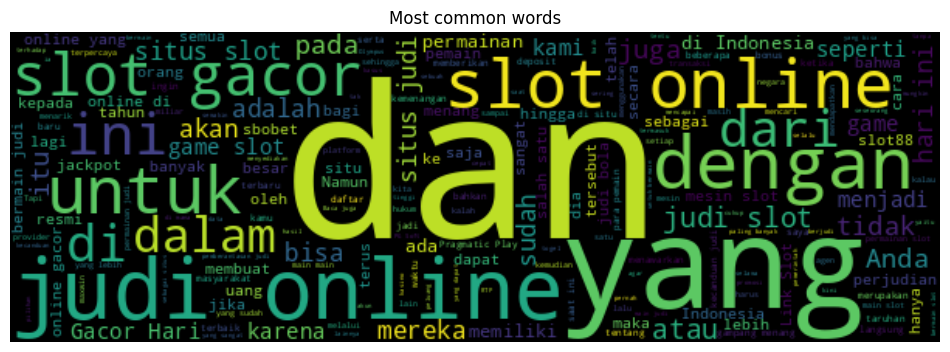

In [13]:
# Plotting Word Cloud
plt.figure(figsize=(12, 7))
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(df['cleaned_content_v1']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most common words")
plt.axis("off")
plt.show()

Regarding the wordcloud before text preprocessing, we still can't see the clearn pattern which words are being used inside the website, since the text is dominated with unimportant words

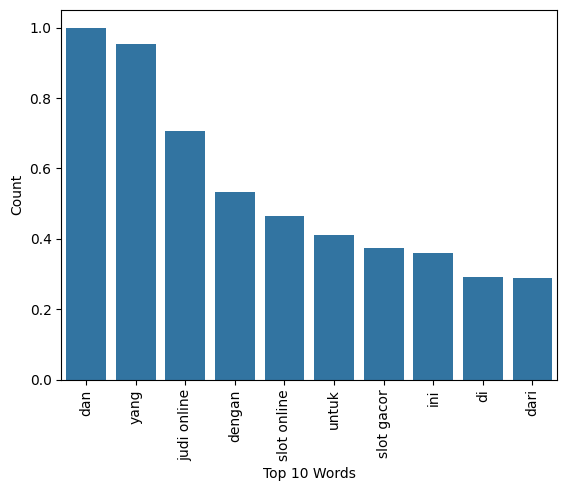

In [14]:
# Displaying top 10 words being used the most (based from wordcloud)
x = []
y = []
for key,value in wordcloud.words_.items():
    x.append(key)
    y.append(value)
    if len(x) == 10:
        break
sns.barplot(x=x,y=y)
plt.title("")
plt.xlabel("Top 10 Words")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Above are the top 10 words being used within the website for our dataset. This initial stage, we can see several words such as "judi", "online", slot", "gacor" is presented in our dataset.

Next, we want to focus how the gambling site and non gambling site differentiate with each other.

---

## 5. Data Preprocessing / Feature Engineering

### Text Processing

The crucial part of NLP project is how well we are preprocessing the data to be fed into the model. Thus, in this section, we will be performing the preprocessing. Text processing will be utilized to perform the following:
1. Case folding to lower case = lower case all words
2. Mention removal
3. Hashtag removal
4. Newline removal
5. Whitespace removal
6. URL Removal
7. Non-letter removal
8. Tokenization (word based) = will create token based on word
9. Stopword = using stopword english, since most of the review in english
10. Stemming = to only process the main word

Additionally, considering the inference would be the value from a scrapped website. We will be utilizing regex to find pattern and only extract the main content from the website

In [15]:
# Define additional stopword
list_stopwds = ['menu', 'close', 'home', 'pemilu', 'pendidikan', 'advertisement', 'kendaraan', 'binatu', 'toko', 'ban,', 'memancing', 'udara', 'dapur',
                'rc', 'cari', 'logout', 'perkakas', 'home', 'suku', 'ruangan', 'tangan', 'raket', 'debu', 'buku', 'komputer', 'sepak', 'olahraga', 'rumah',
                'diskon', 'velg,', 'tidur', 'peliharaan', 'pembersih', 'santai', 'camilan', 'audio', 'sarapan,', 'kelengkapan', 'pakai', 'pembatalan', 'video',
                'televisi', 'laki-laki', 'kategori', 'sayur', 'daftar', 'fashion', 'hewan', 'data', 'entertainment', 'baju', 'bahan', 'diri', 'camping', 'tagihan',
                'yang', 'akun', 'balita', 'minuman', 'lantai', 'sepatu', 'suplemen', 'kebersihan', 'ulasan', 'jam', 'keperluan', 'pengkilat', 'lazmall', 'dewasa',
                'laptop', 'perbaikan', 'kerajinan', 'kamar', 'cadang', 'saya', 'berteknologi', 'tempat', 'peralatan', 'sepeda', 'oli', 'lazblog', 'kulit', 'cokelat',
                'sekali', '&', 'ikuti', 'komponen', 'cairan', 'gadget', 'game', 'perhiasan', 'medis', 'velg', 'printer', 'ibu', 'interior', 'anak', 'wellness', 'perangkat',
                'pesanan', 'gym,', 'desktop', 'fitness', 'outdoor', 'yoga', 'luar', 'mobil', 'elektronik', 'bayi', 'laki-laki', 'dan', 'login', 'penerangan', 'buah',
                'gaya', 'perawatan', 'perlengkapan', 'lingerie,', 'mandi', 'pria', 'masakan', 'penghisap', 'furnitur', 'wanita', 'mobil,', 'penyejuk', 'helm', 'handphone',
                'feedback', 'permen', 'console', 'alat', 'kebun', 'pakaian', 'parfum', 'motor', 'tangga', 'aksesoris', 'bola', 'besar', 'perempuan', 'media,', 'voucher',
                'makanan', 'makeup', 'menyusui', 'bumbu', 'kecil', 'kamera', 'dekorasi', 'tubuh', 'tulis', 'sereal', 'panel', 'rambut', 'internal', 'exterior', 'otomotif',
                'kecantikan', 'berkendara', 'pengembalian', 'air', 'kebutuhan', 'wishlist', 'tas', 'sexual', 'pulsa', 'kesehatan', 'hiking', 'hidup', 'musik', 'tv', 'ban',
                'dalam', 'popok', 'penyimpanan', 'tablet', 'muslim', 'selai', 'mainan']

In [16]:
# Define Stopwords
from nltk.corpus import stopwords

# Define stopword for indonesian words
stpwds_id = list(set(stopwords.words('indonesian')))

# Append the stopword with the additional initialized stopwords
stpwds_id = stpwds_id + list_stopwds

In [17]:
# Define Stemmer
stemmer = StemmerFactory().create_stemmer()

# Function for text processing
def text_preprocessing(text):
  '''
  Function to preprocess text including case folding, mention removal, hashtag removal,
  newline removal, whitespace removal, url removal, non-letter removal, tokenization,
  stopword removal, and stemming
  '''
  # Case folding
  text = text.lower()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Remove navigation and irrelevant sections
  text = re.sub(r'(?i)(menu close|edisi|daftar isi|newsletter|penulis|mitra|privasi|syarat).*?$', '', text, flags=re.DOTALL)

  # Remove promotional phrases and repetitive categories
  text = re.sub(r'(INTERNAL FEEDBACK|Slot Gacor|Situs Judi Slot|Download Aplikasinya|Belanja Sekarang|Vouchernya|Produk Eksklusif|Hubungi kami di Live Chat).*?(\.\s|$)', '', text, flags=re.DOTALL)

  # Whitespace removal
  text = text.strip()

  # Remove non-latin words from the sentences.
  text = re.sub(r'[^\x00-\x7f]', r'', text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_id]

  # Removing Words less than 2 lengths
  tokens =  [word for word in tokens if len(word) > 2]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

After determining the function to preprocess the text. We will apply it to our data

In [18]:
# Apply the test processing function

df['text_processed'] = df['cleaned_content_v1'].apply(lambda x: text_preprocessing(x))
df

,web_url,cleaned_content_v1,label,tokenized_sentences_length,tokenized_words_length,text_processed
0,https://www.nikosgreekrestaurant.com/,Untuk kalian yang sedang mencari slot gacor un...,1,10,148,cari slot gacor untung puluh juta mahjong jawa...
1,https://electricfeelgood.com/,Situs Judi Slot Online Gacor Hari Ini Paling T...,1,67,1452,situs judi slot online gacor percaya resmi ind...
2,https://thedinerqc.com/,Vegas123 Situs Judi Slot Online Slot88 Gacor R...,1,15,396,vegas situs judi slot online slot gacor resmi ...
3,https://threeirishgirls.com/,TEXAS88: Situs Judi Slot Online Paling Gacor T...,1,48,1253,texas situs judi slot online gacor percaya liv...
4,https://pafipcbitung.org/,Registrasi Bergabunglah DEWANAGA77 untuk menga...,1,17,256,registrasi gabung dewanaga alami main tarik ni...
5,https://pafikutaitimur.org/,OLYMPUS88: Situs Judi Slot Online Daftar Slot8...,1,100,2012,olympus situs judi slot online slot gacor olym...
6,https://justtransitioninitiative.org/,SIP33 - Situs Judi Slot Online Maxwin Gacor & ...,1,21,436,sip situs judi slot online maxwin gacor slot p...
7,https://thedinerqc.com/,Vegas123 Situs Judi Slot Online Slot88 Gacor R...,1,14,351,vegas situs judi slot online slot gacor resmi ...
8,https://pafisumbabarat.org/,SBOBET88: Daftar Link SBOBET Agen Taruhan Judi...,1,111,2416,sbobet link sbobet agen taruh judi percaya sit...
9,https://www.seattlemandaringate.com/,Slot88 > Link Situs Slot Gacor Paling Akurat G...,1,9,255,slot link situs slot gacor akurat gampang mena...


In [19]:
df.to_csv("after_cleaning.csv", index=False)

After text processing, we would like to know the words max and average length

In [20]:
# Tokinze review to sentence and words
df['tokenized_word_after'] = df['text_processed'].apply(lambda x: len(nltk.word_tokenize(x)))

# Determining max and avg words length by each sentiment
print("Max and Average Sentence Length \n")
print(f"Max word length in Gambling \t = {df[df['label'] == 1]['tokenized_word_after'].max()}")
print(f"Max word length in News \t = {df[df['label'] == 0]['tokenized_word_after'].max()}")
print(f"Avg word length in Gambling \t = {df[df['label'] == 1]['tokenized_word_after'].mean():.2f}")
print(f"Avg word length in News \t = {df[df['label'] == 0]['tokenized_word_after'].mean():.2f}\n")

Max and Average Sentence Length 

Max word length in Gambling 	 = 1804
Max word length in News 	 = 1254
Avg word length in Gambling 	 = 283.11
Avg word length in News 	 = 368.33



The number of token after text processing reduces significantly. This means that the text processing is effectively extracting meaningful words in our dataset

### Target Conversion

In [21]:
df.label.value_counts()

,count
label,
1,27
0,27


We have a balance target of gambling website and non gambling website



### Splitting the dataset

In [22]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df.text_processed,
                                                    df["label"],
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=df.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=42,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (40,)
Val Size   :  (5,)
Test Size  :  (9,)


After splitting, we have 40 rows in our train-set, 5 rows in our validation-set and 9 rows in our test-set.

We know that this amount of data is not sufficient enough to develop a general model. However, with the time and resource limitation on this project, we decided to continue with our current resource.

### One-Hot Encoding the Label

We also require to encode our label, this will utilize one hot encoding

In [23]:
# Change Target to One Hot Encoding

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

### Text Vectorization

In [24]:
vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [25]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(vectorizer.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  2354
Maximum Sentence Length :  1804 tokens


We have the total vocab of 2403 words inside of our dataset, with max sentence length up to 1885 tokens.

In [26]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))

text_vectorization.adapt(X_train)

We will apply the text vectorization to represent our text into numerical data. At this stage, we will assess the model to be trained based on **words**. Thus, we will utilize split of whitespace

Displaying the top 20 of tokens

In [27]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'slot',
 'judi',
 'online',
 'main',
 'situs',
 'gacor',
 'menang',
 'indonesia',
 'mesin',
 'uang',
 'orang',
 'milik',
 'percaya',
 'pilih',
 'sedia',
 'mudah',
 'sbobet',
 'taruh']

Above are the list of most used tokens inside the dataset. We already can see the pattern of which words are being used inside the gambling website.

### Word Embedding

Word Embedding is one of the powerful tools in data preprocessing before model training. Embedding will represents words for text analysis in the form of real-valued vectors

In [28]:
# Word Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=64,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)
embedding

We will utilize total vocab as our input dim and maximum input length of maximum sentence length. As for the output, considering our limitation on the data, we will be using 64 output dim

---

## 6. Neural Network Modeling

For the modelling, we will be using Bidirectional LSTM as it will offers several advantages, particularly with a small dataset. Bidirectional LSTMs process input data in both forward and backward directions, enabling them to capture context from both past and future words. Additionally, Bidirectional LSTMs can help reduce overfitting, a common concern with small datasets, by effectively learning contextual patterns that lead to better generalization on unseen data. Overall, these features make Bidirectional LSTMs a strong choice for accurately classifying websites even when the available data is limited.

Source: Joulin, A., Mikolov, T., Grave, E., Bojanowski, P., Mikolov, P., & Tzeng, R. (2017). "Bag of Tricks for Efficient Text Classification."

Overall flow of the Neural Network:  
1. Sequential Model Definition
2. Text Vectorization Layer = Converting raw text into numerical representaion
3. Embedding Layer = To understand the relation between words
4. Hidden Layer 1 = Bidirectional LSTM, very common for NLP practices. Advantageous to learn context from past and future tokens. Thus, can understand complex pattern
5. Hidden Layer 2 = Similar with Hidden Layer 1, but with smaller number of neutron.
6. Output Layer = Binary classification. However, using softmax is providing a more good fit model rather than the sigmoid.

Some model generalization is also performed as follows:
1. Hyperparameter regularizer 'l2' in embedding layer to prevent overfitting.
2. Dropout layer to reduce overfitting
3. Adding layerNormalization to prevent overfitting.
4. Schedule transfer learning, to change the learning rate of the model overtime and resulting a better learning rate.

### Model Definition

We want to assess the precision evaluation. We first need to define a function to calculate precision

In [29]:
# Precision metric function
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

In [30]:
# Model Improvement
%%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define Model
model_2 = Sequential()

# Text Vectorization Layer
model_2.add(text_vectorization)

# Embedding Layer
model_2.add(Embedding(input_dim=total_vocab,
                      output_dim=64,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len,
                      embeddings_regularizer=regularizers.l2(0.01)))

# Hidden Layer 1
model_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), kernel_regularizer='l2')))
model_2.add(Dropout(0.2))             # Dropout Hidden Layer 1
model_2.add(LayerNormalization())     # Normalization Hidden Layer 1

# Hidden Layer 2
model_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), kernel_regularizer='l2')))
model_2.add(Dropout(0.2))             # Dropout Hidden Layer 2
model_2.add(LayerNormalization())     # Normalization Hidden Layer 2

# Output Layer
model_2.add(Dense(2, activation='softmax'))


# Schedule Learning Rate
lr_schedule = ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)


# Model Compiling
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', precision])


# Summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1804)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1804, 64)          150656    
                                                                 
 bidirectional (Bidirection  (None, 1804, 64)          24832     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 1804, 64)          0         
                                                                 
 layer_normalization (Layer  (None, 1804, 64)          128       
 Normalization)                                                  
                                                        

Input Shape: (None, max_sen_len) where None represents the batch size (no batch size used in this case since we have small dataset) and max_sen_len is the fixed length of each input sequence (1885 tokens).

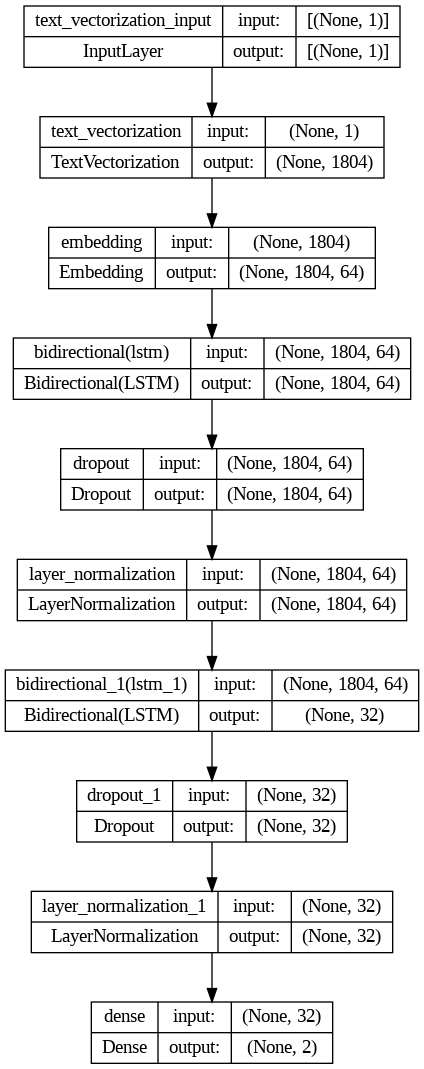

In [31]:
# Plot Layers
tf.keras.utils.plot_model(model_2, show_shapes=True)

### Model Training

In [32]:
# Model Training
%%time
model_2_hist = model_2.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
2/2 [==============================] - 16s 5s/step - loss: 5.3597 - accuracy: 0.5000 - precision: 0.5469 - val_loss: 4.6401 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 2/50
2/2 [==============================] - 9s 4s/step - loss: 4.5568 - accuracy: 0.8500 - precision: 0.9062 - val_loss: 4.3386 - val_accuracy: 0.8000 - val_precision: 0.8000
Epoch 3/50
2/2 [==============================] - 6s 3s/step - loss: 4.3527 - accuracy: 0.9250 - precision: 0.9531 - val_loss: 4.1218 - val_accuracy: 0.8000 - val_precision: 0.8000
Epoch 4/50
2/2 [==============================] - 6s 3s/step - loss: 4.0687 - accuracy: 0.9750 - precision: 0.9844 - val_loss: 3.8978 - val_accuracy: 0.8000 - val_precision: 0.8000
Epoch 5/50
2/2 [==============================] - 7s 3s/step - loss: 3.8015 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 3.6898 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 6/50
2/2 [==============================] - 6s 3s/step - loss: 3.6034 - accuracy: 1.0000

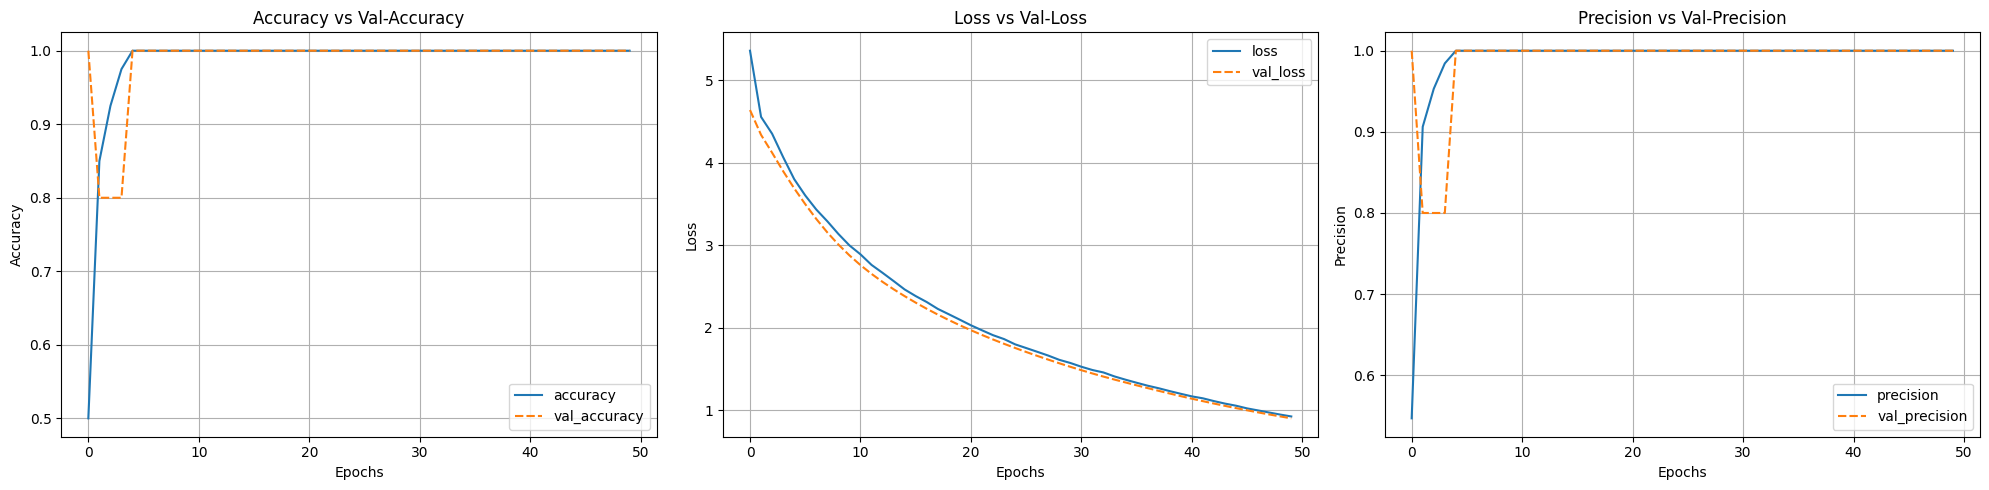

In [33]:
# Convert history to DataFrame
model_2_hist_df = pd.DataFrame(model_2_hist.history)

# Set up the figure
plt.figure(figsize=(20, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
sns.lineplot(data=model_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 3, 2)
sns.lineplot(data=model_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot Precision
plt.subplot(1, 3, 3)
sns.lineplot(data=model_2_hist_df[['precision', 'val_precision']])
plt.grid()
plt.title('Precision vs Val-Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')

# Show plots
plt.tight_layout()
plt.show()

### Model Evaluation

From the accuracy graph and learning curve graph above. This improved model show a ***good-fit*** model with accuracy on the train and validation set at 100%. Additionally the learning curve is very similar between the train-set and validation-set, proving a ***good-fit model***.

We also want to compare the classification report, specifically we want to know the model accuracy in predicting the train-set and test-set.

In [34]:
# Model Evaluation of train-set
y_pred_model2_train = np.argmax(model_2.predict(X_train), axis=-1)

print(classification_report(y_train, y_pred_model2_train))

2/2 [==============================] - 3s 288ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [35]:
# Model Evaluation of test-set
y_pred_model2 = np.argmax(model_2.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred_model2))

1/1 [==============================] - 0s 299ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



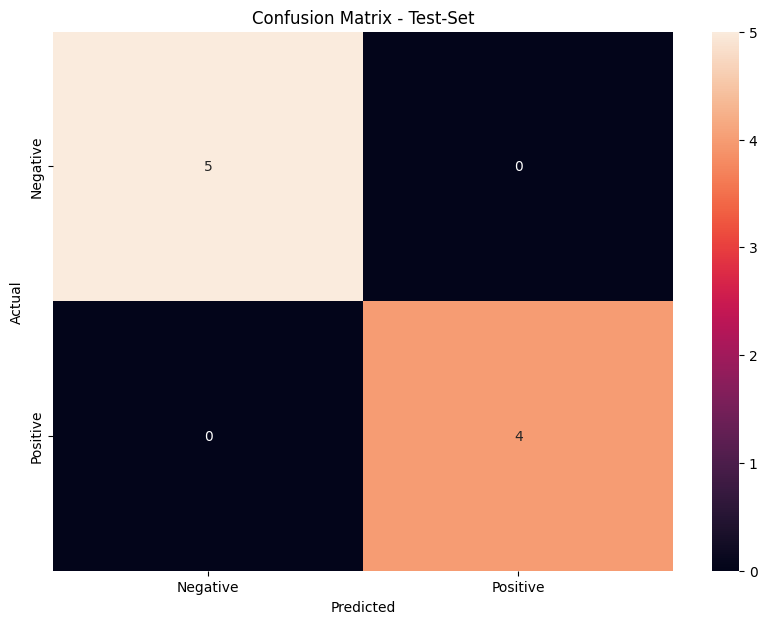

In [36]:
# Plotting confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_model2)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test-Set')
plt.show()

From the classification report, we can see that the model improvement is considered as a ***good-fit*** model. We have achieved an accuracy and precision evaluation of 100% in both the train-set and the test-set.

Additionally, from the confusion matriks with the limitation of 9 test-data available in our dataset. We have predicted all unseen data correctly as True Negative (5 data) and True Positive (4 data)

### Plus and Minus Point of the Model

Plus and Minus Model will be evaluated in this section.

Plus Model = Where the model is predicting correctly.  
Minus Model = Where the model is miss to predict

First, we need to combine the prediction with the original dataframe

In [37]:
# Create new concat dataframe pred with original dataframe
eval_df = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_model2)
})
eval = pd.concat([pd.DataFrame(X_test), eval_df],axis=1)
eval

,text_processed,actual,prediction
41,jaring judi online kamboja incar warga negara ...,0,0
34,laku judi online ancam hukum penjara akses int...,0,0
46,polisi mengangkap sangka serta barang bukti ju...,0,0
9,slot link situs slot gacor akurat gampang mena...,1,1
24,salju sensasi link slot online baru gacor para...,1,1
16,link slot gacor situs slot online gacor malam ...,1,1
11,slot online gacor soft demo slot pragmatic pla...,1,1
47,menteri komunikasi informatika kominfo blokir ...,0,0
37,waspada modus tipu judi online waspada modus t...,0,0


Based on the test-set, our model can predict all the data correctly

#### Model Minus Point (FN & FP)

In [38]:
# Model Minus Point (FN & FP)
minus_model = eval[((eval['actual']==1) & (eval['prediction']==0) | (eval['actual']==0) & (eval['prediction']==1))]
minus_model

,text_processed,actual,prediction


Since the limitation of data for the test-set, we are unable to identify our minus model because our data can predict all the test set correctly.

In terms of generalization, a drawback of this model is its limited ability to predict when faced with a broader range of data, as the current training dataset is very limited.

In [39]:
# Displaying top 10 most used words that gives us wrong prediction

FreqOfWords_minus = minus_model['text_processed'].str.split(expand=True).stack().value_counts()
FreqOfWords_minus_top10 = FreqOfWords_minus[:10]
FreqOfWords_minus_top10

<ipython-input-39-559f4d8d3a9f>:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  FreqOfWords_minus_top10 = FreqOfWords_minus[:10]


,count


#### Plus Point

Check where our model is predicting correctly (TP & TN)

In [40]:
# Query through where predicting is correct (TP & TN)
plus_model = eval[(eval['actual']==1) &(eval['prediction']==1) | (eval['actual']==0) & (eval['prediction']==0)]
plus_model

,text_processed,actual,prediction
41,jaring judi online kamboja incar warga negara ...,0,0
34,laku judi online ancam hukum penjara akses int...,0,0
46,polisi mengangkap sangka serta barang bukti ju...,0,0
9,slot link situs slot gacor akurat gampang mena...,1,1
24,salju sensasi link slot online baru gacor para...,1,1
16,link slot gacor situs slot online gacor malam ...,1,1
11,slot online gacor soft demo slot pragmatic pla...,1,1
47,menteri komunikasi informatika kominfo blokir ...,0,0
37,waspada modus tipu judi online waspada modus t...,0,0


In [41]:
# Displaying top 10 most used words that gives us corret prediction

FreqOfWords_plus = plus_model['text_processed'].str.split(expand=True).stack().value_counts()
FreqOfWords_plus_top10 = FreqOfWords_plus[:10]
FreqOfWords_plus_top10

,count
judi,190
online,160
slot,94
main,74
gacor,47
situs,38
uang,34
modus,23
candu,22
indonesia,21


Our model performs optimally when the review includes the specified words. The three most accurately predicted words by the model are 'judi,' 'online', and 'slot.'

#### True Positive - Key words of predicting the gambling website correctly

In [42]:
# True Positive
true_pos = eval[(eval['actual']==1) &(eval['prediction']==1)]

# Displaying top 5 most used words that gives us corret prediction (TP)

FreqOfWords_tp = true_pos['text_processed'].str.split(expand=True).stack().value_counts()
FreqOfWords_tp_top5 = FreqOfWords_tp[:5]
FreqOfWords_tp_top5

,count
slot,88
gacor,47
main,37
online,26
suite,16


From the test set, our model accurately identifies true positives (actual gambling websites) when the content includes words such as "slot," "gacor," "main," "online," and "suite."

#### True Negative - Key words of predicting the non gambling website correctly

In [43]:
# True Negative
true_neg = eval[(eval['actual']==0) &(eval['prediction']==0)]

# Displaying top 5 most used words that gives us corret prediction (TN)

FreqOfWords_tn = true_neg['text_processed'].str.split(expand=True).stack().value_counts()
FreqOfWords_tn_top5 = FreqOfWords_tn[:5]
FreqOfWords_tn_top5

,count
judi,186
online,134
main,37
uang,34
modus,23


On the other hand, our model accurately identifies true negative (non gambling websites) when the content includes words such as "judi," "online", "main," "uang," and "modus."

#### EDA After Overall Dataset

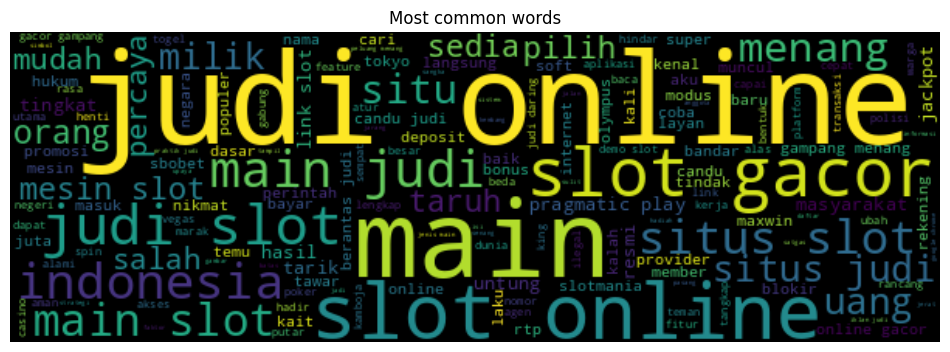

In [44]:
# Plotting Word Cloud
plt.figure(figsize=(12, 7))
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(df['text_processed']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most common words")
plt.axis("off")
plt.show()

Wordcloud above identify the most used words inside the website from our dataset. It includes general words such as "slot", "judi", "main", "gacor", "online".

We need to know the key difference of the most used words between the gambling website and non gambling website. Thus, in the next section, we will provide wordcloud for that two website

#### EDA After Gambling Website

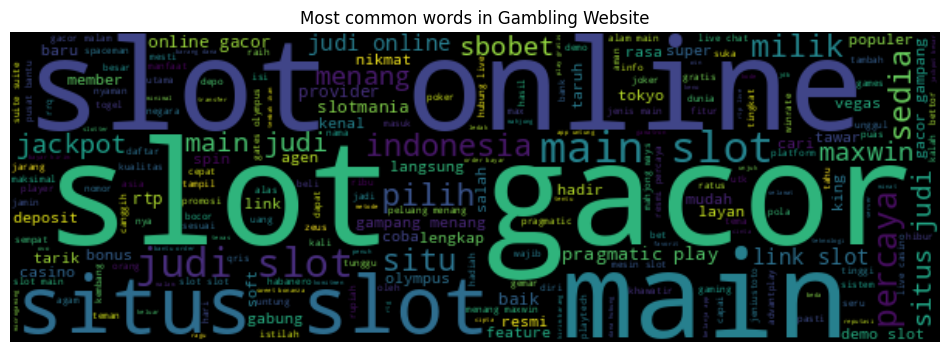

In [45]:
# Dataframe for gambling website for EDA
# Gambling Website
gambling_web = df[(df['label']==1)]

# Plotting Word Cloud
plt.figure(figsize=(12, 7))
wordcloud_gambling = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(gambling_web['text_processed']))
plt.imshow(wordcloud_gambling, interpolation='bilinear')
plt.title("Most common words in Gambling Website")
plt.axis("off")
plt.show()

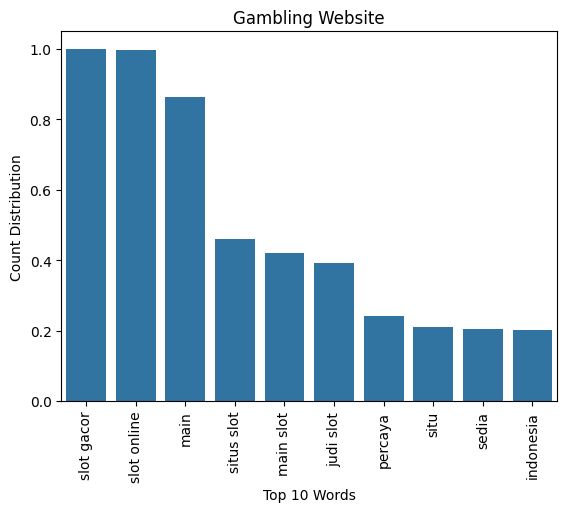

In [46]:
# Displaying top 10 words being used the most (based from wordcloud)
x = []
y = []
for key,value in wordcloud_gambling.words_.items():
    x.append(key)
    y.append(value)
    if len(x) == 10:
        break
sns.barplot(x=x,y=y)
plt.title("Gambling Website")
plt.xlabel("Top 10 Words")
plt.ylabel("Count Distribution")
plt.xticks(rotation=90)
plt.show()

From the wordcloud and barplot above, the gambling website is dominated with the presence of words such as "slot", "gacor", "online", "main", "situs". This words are align with our manual observation while browsing in the gambling website.

#### EDA After Non-Gambling / News Dataset

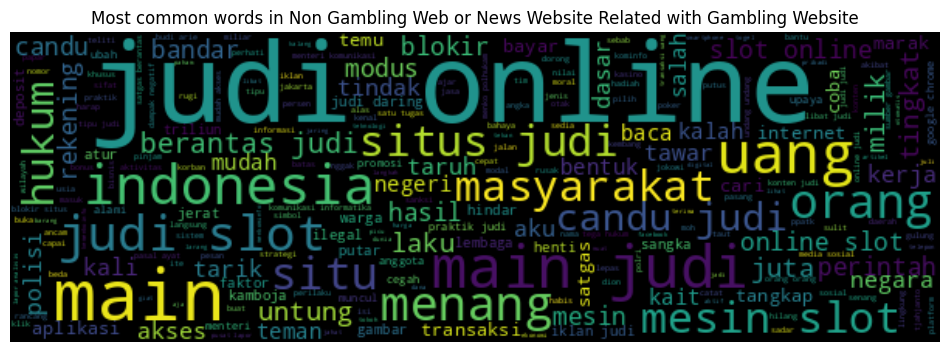

In [47]:
# Dataframe for gambling website for EDA
# Non-Gambling Website
non_gamble_web = df[(df['label']==0)]

# Plotting Word Cloud
plt.figure(figsize=(12, 7))
wordcloud_non = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(non_gamble_web['text_processed']))
plt.imshow(wordcloud_non, interpolation='bilinear')
plt.title("Most common words in Non Gambling Web or News Website Related with Gambling Website")
plt.axis("off")
plt.show()

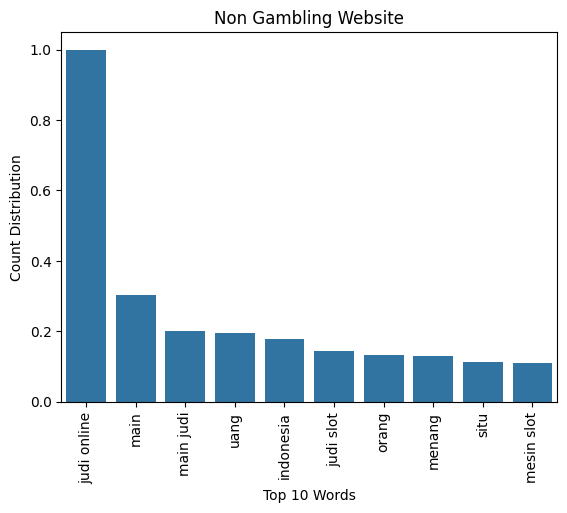

In [62]:
# Displaying top 10 words being used the most (based from wordcloud)
x = []
y = []
for key,value in wordcloud_non.words_.items():
    x.append(key)
    y.append(value)
    if len(x) == 10:
        break
sns.barplot(x=x,y=y)
plt.title("Non Gambling Website")
plt.xlabel("Top 10 Words")
plt.ylabel("Count Distribution")
plt.xticks(rotation=90)
plt.show()

On the other hand, the word assosiated with non gambling website (news web in our case) is dominated by word "judi" and "online". Small proportion of "main" also observed from the dataset

---

## 8. Model Saving

We will save the modelthat will be used for inference and predicting the gambling website

In [51]:
# Saving Best Model
model_2.save('model_final_FP')


In [52]:
!zip -r model_final_FP.zip model_final_FP
from google.colab import files
files.download('model_final_FP.zip')

  adding: model_final_FP/ (stored 0%)
  adding: model_final_FP/keras_metadata.pb (deflated 92%)
  adding: model_final_FP/fingerprint.pb (stored 0%)
  adding: model_final_FP/variables/ (stored 0%)
  adding: model_final_FP/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: model_final_FP/variables/variables.index (deflated 66%)
  adding: model_final_FP/assets/ (stored 0%)
  adding: model_final_FP/saved_model.pb (deflated 89%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

## 9. Model Inference

Inference of the model will be done in separated section using database integrated system

---

## 10. Conclusion

The metric that will be focused for evaluating model is **Precision**. By prioritizing **precision** as a key metric in our predictive model, we aim to ensure that when a website is flagged as gambling-related, it is highly likely to be accurate, thus reducing false positives. This approach will complies with ethical considerations when we want to perform autonomous website blocking.

Model Accuracy:

| Parameter     | Model Accuracy | Model Precision |
| ----------- | ----------- |----------- |
| Train-set   | 1.00 | 1.00     |
| Test-set  | 1.00 | 1.00    |

***Exploratory Data Analysis:***
In our exploratory data analysis, we found distinct language patterns between gambling and non-gambling websites. The word cloud and bar plot reveal that the **gambling site prominently features terms like "slot," "gacor," "online," "main," and "situs,"** consistent with our manual browsing observations. Conversely, the non-gambling website, specifically a news site, is primarily characterized by the presence of the words "judi" and "online," with a minor occurrence of "main." This analysis highlights the key difference in terminology or most words being used, suggesting that **while both types of sites may include "online," gambling sites are more focused on terminology such as "gacor" and "slot**.

***Based on what we have done in this notebook, it can be concluded that:***
1. Model have achieved a good-fit model and ready for initial deployment.
2. Model can predict correctly which website are categorized as gambling website and non gambling website

***Plus Minus Model:***

**Plus Model**: Our model can accurately predicting outcomes when the data contain specific keywords. It demonstrates strong accuracy with the three most predictive words being "gacor," "online," and "slot" for the True Positive.  Additionally, it effectively identifies true negatives (non-gambling websites) when the content includes terms like "judi," "online," "main," "uang," and "modus."

**Minus Model:** However, due to the limited size of our test set, we cannot fully assess the model's weaknesses, as it has managed to predict all data from the Test-set correctly. This limitation raises concerns regarding generalization, where the model ability to handle a broader dataset is restricted by the small size of the current training data.

***Business Recommendation:***  
  
Our goal is to create a scalable, reliable system that automatically blocking website when successfully identified as gambling website. The model have provided high precision score to support our goal. However, since the data available to create the model is very limited. We suggest that the blocking would not be 100% automatic without human intervention at this initial phase.

***Further Improvement:***
- Different method of text preprocessing that able to capture cleaning unrelated content in scrapped data
- Adding more stopword
- Training with different ANN Architecture, such as adding more layer or using functional API.

---